# Business Understanding

Compare director, genre, and rating to each other to better understand the data overall.
Goal; maximixe profit. Large investment that could pay off, suggest especially good directors

Using rating as an indicator of profit; but it is an imperfect indicator

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import zipfile

In [8]:
con = sqlite3.connect('../../zippedData/im.db')

In [40]:
directorRatings = pd.read_sql("""

SELECT p.primary_name AS name,
    AVG(averagerating) as averageRating
FROM movie_basics AS mb
    JOIN movie_ratings AS mr
        ON mr.movie_id = mb.movie_id
    JOIN directors AS d
        ON mr.movie_id = d.movie_id
    JOIN persons AS p
        ON d.person_id = p.person_id
GROUP BY d.person_id

""",con)

In [41]:
directorRatings

name  averageRating
0                   Orson Welles       6.900000
1                    Woody Allen       6.700000
2                     Luc Besson       6.230769
3                Kenneth Branagh       6.850000
4                 John Carpenter       5.600000
...                          ...            ...
57236                   Dahl Lee       8.400000
57237                 Dongwoo Ko       8.400000
57238                  Hepi Mita       7.300000
57239              Laura Cazador       8.500000
57240  Marija Ratkovic Vidakovic       6.600000

[57241 rows x 2 columns]

In [46]:
genreRatingMessy = pd.read_sql("""

SELECT mb.genres as genre,
     AVG(mr.averagerating) AS averageRating
FROM movie_basics AS mb
    JOIN movie_ratings AS mr
        ON mr.movie_id = mb.movie_id
GROUP BY genre

""",con)

Clean up genre data, should get 2 databases, one containing multiple genres (per column), one containing one genre (per column)

In [47]:
genreRatingMessy

genre  averageRating
0                          None       6.496144
1                        Action       5.757712
2           Action,Adult,Comedy       4.650000
3              Action,Adventure       5.223529
4    Action,Adventure,Animation       6.562874
..                          ...            ...
919                    Thriller       5.704244
920                Thriller,War       5.650000
921            Thriller,Western       7.150000
922                         War       6.134043
923                     Western       5.037333

[924 rows x 2 columns]

In [ ]:
pd.read_sql("""

--SELECT

""",con)

# To Do:
- Get mean of a genre's ratings
- Split genres into distinct entries (leaves many movies counted twice, so also want to use data of co-occurring genres)

# Notes
- 

In [2]:
!ls ../../zippedData/

bom.movie_gross.csv.gz
im.db
im.db.zip
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


In [3]:
movieGrossData = pd.read_csv("../../zippedData/bom.movie_gross.csv.gz")
movieGrossData

title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

     foreign_gross  year  
0        652000000  2010  
1        691300000  2010  
2        664300000  2010  
3        535700000  2010  
4        513900000  2010  
...            ...   ...  
3382           NaN  2018  
3383           NaN  2018  
3384           NaN  2018  
3385           NaN  2018  
3386           NaN  2018  

[3387 rows x 5 columns]

In [4]:
movieBudgetData = pd.read_csv("../../zippedData/tn.movie_budgets.csv.gz")
movieBudgetData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [5]:
movieBaseData = pd.read_csv("../../zippedData/tmdb.movies.csv.gz")
movieBaseData

Unnamed: 0            genre_ids      id original_language  \
0               0      [12, 14, 10751]   12444                en   
1               1  [14, 12, 16, 10751]   10191                en   
2               2        [12, 28, 878]   10138                en   
3               3      [16, 35, 10751]     862                en   
4               4        [28, 878, 12]   27205                en   
...           ...                  ...     ...               ...   
26512       26512             [27, 18]  488143                en   
26513       26513             [18, 53]  485975                en   
26514       26514         [14, 28, 12]  381231                en   
26515       26515      [10751, 12, 28]  366854                en   
26516       26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                          How to Train Your Dragon      28.734   2010-03-26   
2                                        Iron Man 2      28.515   2010-05-07   
3                                         Toy Story      28.005   1995-11-22   
4                                         Inception      27.920   2010-07-16   
...                                             ...         ...          ...   
26512                         Laboratory Conditions       0.600   2018-10-13   
26513                               _EXHIBIT_84xxx_       0.600   2018-05-01   
26514                                  The Last One       0.600   2018-10-01   
26515                                  Trailer Made       0.600   2018-06-22   
26516                                    The Church       0.600   2018-10-05   

                                              title  vote_average  vote_count  
0      Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                          How to Train Your Dragon           7.7        7610  
2                                        Iron Man 2           6.8       12368  
3                                         Toy Story           7.9       10174  
4                                         Inception           8.3       22186  
...                                             ...           ...         ...  
26512                         Laboratory Conditions           0.0           1  
26513                               _EXHIBIT_84xxx_           0.0           1  
26514                                  The Last One           0.0           1  
26515                                  Trailer Made           0.0           1  
26516                                    The Church           0.0           1  

[26517 rows x 10 columns]

### Least Useful Data
- Rotten Tomatoes Data missing movie names, not useful data
- Name could be extracted from synopsis at least in some cases, but too time consuming and tedious to be worthwhile

In [6]:
!ls ../../zippedData

bom.movie_gross.csv.gz
im.db
im.db.zip
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


In [7]:
# with zipfile.ZipFile('../../zippedData/im.db.zip') as zipref:
#     zipref.extractall('../../zippedData/')

In [9]:
imdbMovieBase = pd.read_sql("""

SELECT *
FROM movie_basics

""",con)

In [10]:
imdbMovieBase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [11]:
imdbMovieRatings = pd.read_sql("""

SELECT *
FROM movie_ratings

""",con)

imdbMovieRatings

movie_id  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]

In [12]:
imdbMovies = pd.read_sql("""

SELECT mb.primary_title AS Title,
    mb.genres AS Genres,
    mr.averagerating AS Rating,
    mr.numvotes AS VoteCount,
    mb.start_year AS ReleaseYear,
    mb.runtime_minutes AS Runtime
FROM movie_basics as mb
    JOIN movie_ratings as mr
        ON mr.movie_id = mb.movie_id
WHERE mr.numvotes >= 1000
ORDER BY start_year DESC, Rating DESC

""",con)

In [13]:
imdbMovies['Genres'] = imdbMovies['Genres'].str.split(',')

In [14]:
imdbMovies['Genres'][0]

['Comedy', 'Drama']

In [15]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(imdbMovies)

Title  \
0                     Once Upon a Time ... in Hollywood   
1                                     Truth and Justice   
2                                                Jersey   
3                                           Tell No One   
4                                                 Chase   
5                                     Kumbalangi Nights   
6                                          Super Deluxe   
7                                     Avengers: Endgame   
8                                              Parasite   
9                                        Breaking Barbi   
10                                                Yatra   
11                             Uri: The Surgical Strike   
12                                            Apollo 11   
13                                   The Tashkent Files   
14                                            Gully Boy   
15                                               Thadam   
16                                                Badla   
17                    John Wick: Chapter 3 - Parabellum   
18                                             Maharshi   
19                                      The Balkan Line   
20                                            Rocketman   
21                                         Madhura Raja   
22                                                  122   
23                                              Lucifer   
24                                       Pain and Glory   
25                                          Last Breath   
26                                               Kesari   
27                       The Boy Who Harnessed the Wind   
28                           Once Upon a Time in London   
29                                      The Wolf's Call   
30           How to Train Your Dragon: The Hidden World   
31                                  Alita: Battle Angel   
32                                            Booksmart   
33                        Homecoming: A Film by Beyoncé   
34                                           Sonchiriya   
35                                                Petta   
36                                              Aladdin   
37                         The Professor and the Madman   
38                                              Shazam!   
39                                      A Dog's Journey   
40                                                 Fyre   
41                      Romulus & Remus: The First King   
42                                              9: Nine   
43                                               Majiji   
44                              Fighting with My Family   
45                                      Five Feet Apart   
46                                          The Mustang   
47                                          Extreme Job   
48                                            Long Shot   
49                                            Paddleton   
50        The Inventor: Out for Blood in Silicon Valley   
51                                                  NGK   
52                                    Leaving Neverland   
53                                                   Us   
54                                       The Highwaymen   
55                                       Captain Marvel   
56                                             The Dirt   
57                                         Missing Link   
58                                            Excursion   
59                                              Tolkien   
60                                   Always Be My Maybe   
61                                  Fisherman's Friends   
62                                       De De Pyaar De   
63                                          I Am Mother   
64                                            Storm Boy   
65                                         Guava Island   
66                                         The Last Boy   
67                                    

In [16]:
pd.read_sql("""

SELECT *
FROM movie_basics as mb
    JOIN movie_ratings as mr
        ON mb.movie_id = mr.movie_id
GROUP BY mb.genres
HAVING COUNT(mb.genres) > 10

""",con)

movie_id                            primary_title  \
0     tt0364201                        Aman Ke Farishtey   
1     tt1136688       Abelar: Tales of an Ancient Empire   
2     tt0448694                            Puss in Boots   
3     tt1390411                  In the Heart of the Sea   
4     tt0448115                                  Shazam!   
..          ...                                      ...   
338   tt0847825                     The Speed of Thought   
339  tt10276074  The Prince of Tennis Best Games!! VOL.2   
340   tt0293069                               Dark Blood   
341   tt1512306                               Blood Army   
342   tt0840789                               Río de oro   

                              original_title  start_year  runtime_minutes  \
0                          Aman Ke Farishtey        2016            137.0   
1                 Tales of an Ancient Empire        2010             86.0   
2                              Puss in Boots        2011             90.0   
3                    In the Heart of the Sea        2015            122.0   
4                                    Shazam!        2019            132.0   
..                                       ...         ...              ...   
338                     The Speed of Thought        2011             93.0   
339  The Prince of Tennis Best Games!! VOL.2        2019             45.0   
340                               Dark Blood        2012             86.0   
341                               Blood Army        2010              NaN   
342                               Río de oro        2010              NaN   

                         genres    movie_id  averagerating  numvotes  
0                        Action   tt0364201            6.4        16  
1              Action,Adventure   tt1136688            3.3      1428  
2    Action,Adventure,Animation   tt0448694            6.6    133355  
3    Action,Adventure,Biography   tt1390411            6.9    108628  
4       Action,Adventure,Comedy   tt0448115            7.4    109051  
..                          ...         ...            ...       ...  
338             Sci-Fi,Thriller   tt0847825            4.8      1503  
339                       Sport  tt10276074            8.3         6  
340                    Thriller   tt0293069            6.6      1053  
341                         War   tt1512306            9.0         5  
342                     Western   tt0840789            6.1        70  

[343 rows x 9 columns]

In [17]:
imdbGenreRatings = pd.read_sql("""

SELECT mb.genres as genres,
    AVG(mr.averagerating) AS genreRating,
    COUNT(mb.genres) as genreCount,
    AVG(mb.runtime_minutes) as averageRuntime,
    SUM(mr.numvotes) as voteCount
FROM movie_basics as mb
    JOIN movie_ratings as mr
        ON mb.movie_id = mr.movie_id
GROUP BY genres
HAVING genreCount > 10
ORDER BY genreRating DESC, genreCount DESC

""",con)

# imdbGenreRatings['genres'] = imdbGenreRatings['genres'].str.split(',')
imdbGenreRatings

genres  genreRating  genreCount  averageRuntime  \
0    Documentary,Family,Sport     8.062500          16       76.800000   
1    Action,Documentary,Sport     7.863158          19       85.000000   
2     Documentary,Family,News     7.721053          19       76.578947   
3    Documentary,Family,Music     7.686957          23       84.428571   
4    Comedy,Documentary,Music     7.628571          14       78.714286   
..                        ...          ...         ...             ...   
338             Action,Horror     4.740260          77       89.114286   
339      Action,Horror,Sci-Fi     4.656250          80       90.533333   
340             Horror,Sci-Fi     4.626966          89       85.464286   
341   Action,Adventure,Horror     4.525000          52       90.057692   
342    Action,Horror,Thriller     4.429091         110       91.640777   

     voteCount  
0          880  
1         3340  
2          916  
3         2389  
4        11116  
..         ...  
338      61362  
339     721869  
340      80489  
341     952522  
342     243297  

[343 rows x 5 columns]

In [18]:
topGenreList = list(imdbGenreRatings['genres'].values)
topGenreDict = {}

for genreList in topGenreList:
    for genre in genreList:
        if genre in topGenreDict.keys():
            topGenreDict[genre] += 1
        else:
            topGenreDict[genre] = 1
topGenreDict

{'D': 197,
 'o': 460,
 'c': 247,
 'u': 158,
 'm': 434,
 'e': 449,
 'n': 335,
 't': 346,
 'a': 577,
 'r': 654,
 'y': 366,
 ',': 553,
 'F': 119,
 'i': 409,
 'l': 148,
 'S': 52,
 'p': 47,
 'A': 151,
 'N': 7,
 'w': 7,
 's': 150,
 'M': 68,
 'C': 126,
 'd': 143,
 'W': 17,
 'v': 57,
 'B': 30,
 'g': 30,
 'h': 76,
 'H': 75,
 'R': 43,
 'T': 46,
 '-': 35}

In [19]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(imdbGenreRatings)

genres  genreRating  genreCount  averageRuntime  \
0           Documentary,Family,Sport     8.062500          16       76.800000   
1           Action,Documentary,Sport     7.863158          19       85.000000   
2            Documentary,Family,News     7.721053          19       76.578947   
3           Documentary,Family,Music     7.686957          23       84.428571   
4           Comedy,Documentary,Music     7.628571          14       78.714286   
5                              Music     7.615341         176      102.213235   
6              Documentary,Drama,War     7.608333          24       81.954545   
7       Adventure,Documentary,Family     7.602632          38       76.864865   
8        Adventure,Documentary,Sport     7.600000          37       71.555556   
9           Action,Documentary,Drama     7.600000          29       91.000000   
10           Documentary,Drama,Sport     7.597436          39       80.512821   
11             Adventure,Documentary     7.567692         130       77.515873   
12       Biography,Documentary,Music     7.566250         240       89.787234   
13      Action,Biography,Documentary     7.560714          28       81.928571   
14        Documentary,Family,History     7.554902          51       79.529412   
15         Documentary,History,Music     7.546341          82       84.950617   
16      Biography,Documentary,Family     7.536364         132       79.507576   
17     Animation,Documentary,History     7.535714          14       78.928571   
18           Documentary,History,War     7.532584          89       83.436782   
19                 Documentary,Sport     7.500000         318       84.178451   
20       Biography,Documentary,Drama     7.498674         377       80.422460   
21   Adventure,Biography,Documentary     7.492982         114       81.446429   
22                   Documentary,War     7.489535          86       80.392857   
23                 Documentary,Music     7.478756         579       89.431985   
24          Comedy,Documentary,Drama     7.477966         118       79.085470   
25         Documentary,Music,Musical     7.476923          13       78.230769   
26        Adventure,Documentary,News     7.471429          14       79.642857   
27      Action,Adventure,Documentary     7.469841          63       74.935484   
28     Adventure,Documentary,History     7.459574          47       74.255319   
29            Documentary,Drama,News     7.457353          68       76.720588   
30     Biography,Documentary,History     7.454071         479       84.300420   
31         Documentary,History,Sport     7.452632          38       83.702703   
32       Adventure,Documentary,Drama     7.447619         105       84.086538   
33       Adventure,Documentary,Music     7.446667          15       72.133333   
34       Biography,Documentary,Sport     7.442000         100       86.618557   
35               Documentary,Musical     7.432258          31       83.400000   
36   Animation,Biography,Documentary     7.417949          39       74.692308   
37                Documentary,Family     7.401527         131       79.068702   
38            Crime,Documentary,News     7.392857          14       84.928571   
39         Documentary,Drama,History     7.392715         151       79.804054   
40        Biography,Documentary,News     7.391111          45       81.711111   
41               Documentary,History     7.389916         476       82.139130   
42           Documentary,Drama,Music     7.388000          25       84.160000   
43           Crime,Documentary,Drama     7.377941          68       82.970149   
44       Biography,Crime,Documentary     7.377922          77       88.519481   
45      Biography,Comedy,Documentary     7.341860         129       84.697674   
46         Crime,Documentary,Mystery     7.333333          12       92.916667   
47                 Documentary,Drama     7.332818         582       79.342657   
48               Documentary,Western     7.321429          14

[Text(0.5, 0, 'Top 20 Genres'),
 Text(0, 0.5, 'Average Rating'),
 Text(0.5, 1.0, 'Average Rating by Genres')]

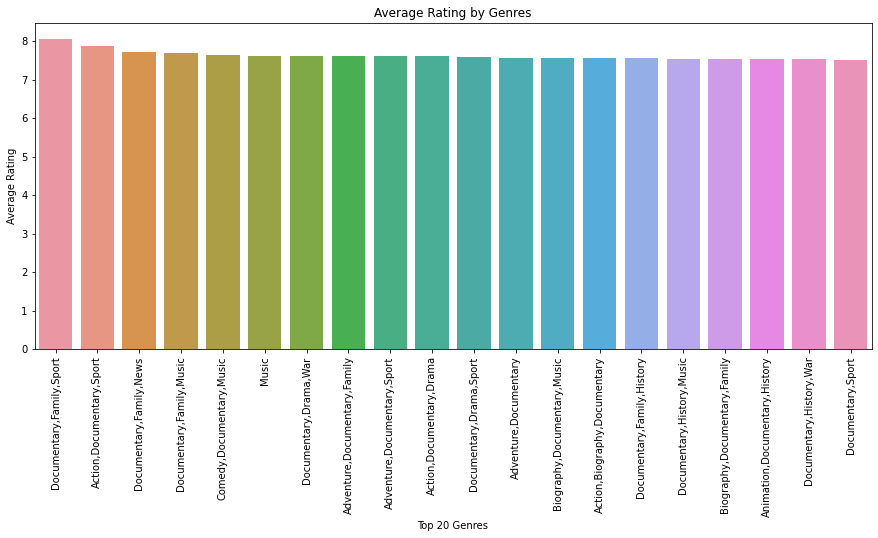

In [33]:
fig,ax = plt.subplots(figsize=(15,6))

sns.barplot(data=imdbGenreRatings[:20],x='genres',y='genreRating')
plt.xticks(rotation=90)
ax.set(xlabel='Top 20 Genres',ylabel='Average Rating',title='Average Rating by Genres')

<AxesSubplot:xlabel='genreRating', ylabel='Count'>

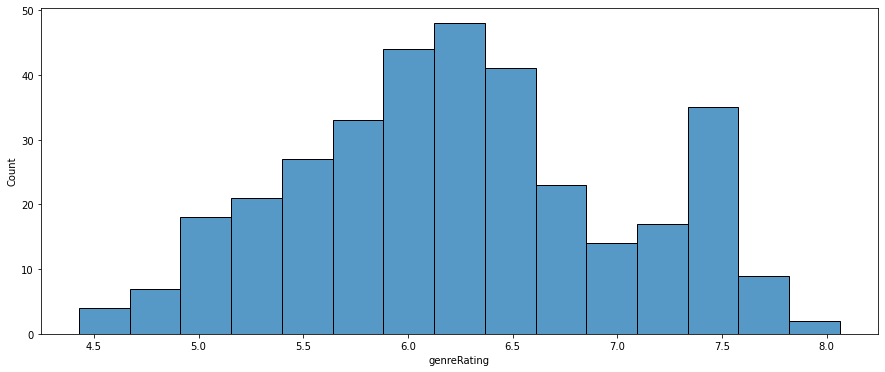

In [21]:
fig,ax = plt.subplots(figsize=(15,6))

sns.histplot(data=imdbGenreRatings,x='genreRating',bins=15)

In [22]:
imdbMovies['Genres'] = imdbMovies['Genres'].str.split(',')

In [23]:
sns.scatterplot(x=imdbMovies['Runtime'],y=imdbMovies['Rating'])

AttributeError: module 'seaborn' has no attribute 'scatter'

In [24]:
pd.read_sql("""

SELECT *
FROM movie_basics as mb
    JOIN movie_ratings as mr
        ON mr.movie_id = mb.movie_id
    JOIN 
WHERE mr.numvotes > 1000

""",con)

DatabaseError: Execution failed on sql '

SELECT *
FROM movie_basics as mb
    JOIN movie_ratings as mr
        ON mr.movie_id = mb.movie_id
    JOIN 
WHERE mr.numvotes > 1000

': near "WHERE": syntax error

In [25]:
pd.read_sql("""

SELECT *
FROM known_for as k
    JOIN writers as w
        ON w.movie_id = k.movie_id
    JOIN persons as p
        ON p.person_id = w.person_id
    JOIN movie_basics as m
        ON m.movie_id = w.movie_id

""",con)

person_id   movie_id   movie_id  person_id  person_id  \
0        nm0061671  tt0837562  tt0837562  nm0063165  nm0063165   
1        nm0061671  tt0837562  tt0837562  nm0244110  nm0244110   
2        nm0061671  tt0837562  tt0837562  nm0806912  nm0806912   
3        nm0061671  tt0837562  tt0837562  nm1087952  nm1087952   
4        nm0061671  tt0837562  tt0837562  nm1156984  nm1156984   
...            ...        ...        ...        ...        ...   
3383101  nm9993380  tt8743182  tt8743182  nm9993379  nm9993379   
3383102  nm9993380  tt8743182  tt8743182  nm9993379  nm9993379   
3383103  nm9993380  tt8743182  tt8743182  nm9993380  nm9993380   
3383104  nm9993380  tt8743182  tt8743182  nm9993380  nm9993380   
3383105  nm9993380  tt8743182  tt8743182  nm9993380  nm9993380   

            primary_name  birth_year  death_year  \
0          Peter Baynham         NaN         NaN   
1            Todd Durham         NaN         NaN   
2          Robert Smigel      1960.0         NaN   
3            Dan Hageman         NaN         NaN   
4          Kevin Hageman         NaN         NaN   
...                  ...         ...         ...   
3383101  Fanny Hozleiter      1988.0         NaN   
3383102  Fanny Hozleiter      1988.0         NaN   
3383103   Pegasus Envoyé         NaN         NaN   
3383104   Pegasus Envoyé         NaN         NaN   
3383105   Pegasus Envoyé         NaN         NaN   

                    primary_profession   movie_id  \
0                writer,actor,producer  tt0837562   
1             writer,director,producer  tt0837562   
2                writer,producer,actor  tt0837562   
3        writer,producer,miscellaneous  tt0837562   
4                writer,producer,actor  tt0837562   
...                                ...        ...   
3383101        director,actress,writer  tt8743182   
3383102        director,actress,writer  tt8743182   
3383103          director,actor,writer  tt8743182   
3383104          director,actor,writer  tt8743182   
3383105          director,actor,writer  tt8743182   

                                  primary_title  \
0                            Hotel Transylvania   
1                            Hotel Transylvania   
2                            Hotel Transylvania   
3                            Hotel Transylvania   
4                            Hotel Transylvania   
...                                         ...   
3383101  Now and Not Later - Embrace the Moment   
3383102  Now and Not Later - Embrace the Moment   
3383103  Now and Not Later - Embrace the Moment   
3383104  Now and Not Later - Embrace the Moment   
3383105  Now and Not Later - Embrace the Moment   

                                 original_title  start_year  runtime_minutes  \
0                            Hotel Transylvania        2012             91.0   
1                            Hotel Transylvania        2012             91.0   
2                            Hotel Transylvania        2012             91.0   
3                            Hotel Transylvania        2012             91.0   
4                            Hotel Transylvania        2012             91.0   
...                                         ...         ...              ...   
3383101  Now and Not Later - Embrace the Moment        2019              NaN   
3383102  Now and Not Later - Embrace the Moment        2019              NaN   
3383103  Now and Not Later - Embrace the Moment        2019              NaN   
3383104  Now and Not Later - Embrace the Moment        2019              NaN   
3383105  Now and Not Later - Embrace the Moment        2019              NaN   

                          genres  
0        Animation,Comedy,Family  
1        Animation,Comedy,Family  
2        Animation,Comedy,Family  
3        Animation,Comedy,Family  
4        Animation,Comedy,Family  
...                          ...  
3383101   Biography,Comedy,Drama  
3383102   Biography,Comedy,Drama  
3383103   Biography,Comedy,Drama  
3383104   Biography,Comedy,Dra

In [26]:
actorRatings = pd.read_sql("""

SELECT pe.primary_name AS actor,
    AVG(mr.averagerating) AS averageRating
FROM principals as pr
    JOIN persons as pe
        ON pr.person_id = pe.person_id
    JOIN movie_basics as m
        ON m.movie_id = pr.movie_id
    JOIN movie_ratings as mr
        ON m.movie_id = mr.movie_id
WHERE category = 'actor' AND mr.numvotes > 1000
GROUP BY actor
ORDER BY averageRating DESC

""",con)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(actorRatings)

actor  averageRating
0                       Rezo Chkhikvishvili       9.600000
1                         Gogi Turkiashvili       9.600000
2                      Giorgi Megrelishvili       9.600000
3                        Uddika Premarathna       9.500000
4                           Roshan Ravindra       9.500000
5                           Priit Võigemast       9.300000
6                              Patrick Hume       9.300000
7                              Partho Barua       9.300000
8                                 Ozan Agaç       9.300000
9                            Donavon Warren       9.300000
10                               Bedii Akin       9.300000
11                              Sunil Barve       9.200000
12                       Praveena Paruchuri       9.200000
13                            Mohan Bhagath       9.200000
14                             Eric Febrian       9.100000
15                            Denny Sumargo       9.100000
16                           Daniel Mananta       9.100000
17                          Shanmugha Rajan       9.000000
18                    Rabindra Singh Baniya       9.000000
19                          Prakash Ghimire       9.000000
20                                  Lijeesh       9.000000
21                     Khagendra Lamichhane       9.000000
22                                   Kathir       9.000000
23                          Joshua Suherman       9.000000
24                            John Killoran       9.000000
25                            Harish Kalyan       9.000000
26                                     Hari       9.000000
27                            Brandon Salim       9.000000
28                              Bipin Karki       9.000000
29                                Bayu Skak       9.000000
30                        Nann Wai Wai Htun       8.900000
31                                     Htoo       8.900000
32                             Hla Yin Kyae       8.900000
33                                   Antony       8.900000
34                         Abu Valayamkulam       8.900000
35                            Tae-Hyung Kim       8.800000
36                                     Suga       8.800000
37                          Shin'ichi Chiba       8.800000
38                        Shankar Mahadevan       8.800000
39                             Seok-jin Kim       8.800000
40                          Sangili Murugan       8.800000
41                              Robin Duran       8.800000
42                           Ramin Karimloo       8.800000
43                          Pradeep Anthony       8.800000
44                               Norm Lewis       8.800000
45                             Nam-joon Kim       8.800000
46                            Michael Bowen       8.800000
47                             Mandeep Mani       8.800000
48                              Ji-min Park       8.800000
49                           Jeong-guk Jeon       8.800000
50                                   J-Hope       8.800000
51                               Guggu Gill       8.800000
52                              Drew Fuller       8.800000
53                                      BTS       8.800000
54                                   Arnold       8.800000
55                                Alfie Boe       8.800000
56                          Adithya Bhaskar       8.800000
57                            Hadley Fraser       8.750000
58                          Sebastian Croft       8.700000
59                         Sachin Tendulkar       8.700000
60                              Ross McCall       8.700000
61                      Rodrigo Guirao Díaz       8.700000
62                          Peter De Jersey       8.700000
63                               Paul Logan       8.700000
64                          Patrick Sweeney       8.700000
65                             Mayuresh Pem       8.700000
66                              Kyle Clarke       8.700000
67                        

In [ ]:
directorRatings = pd.read_sql("""

SELECT pe.primary_name AS director,
    AVG(mr.averagerating) AS averageRating,
    COUNT(mr.averagerating) as movieCount
FROM principals as pr
    JOIN persons as pe
        ON pr.person_id = pe.person_id
    JOIN movie_basics as m
        ON m.movie_id = pr.movie_id
    JOIN movie_ratings as mr
        ON m.movie_id = mr.movie_id
WHERE category = 'director' AND mr.numvotes > 100
GROUP BY primary_name
HAVING movieCount > 1
ORDER BY averageRating DESC

""",con)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(directorRatings)

In [ ]:
ax,fig = plt.subplots(figsize=(10,6))

sns.histplot(data=directorRatings,x='averageRating')

In [ ]:
movieInfo = pd.read_sql("""

SELECT mb.primary_title AS title,
    mb.runtime_minutes AS runtime,
    mr.averagerating AS movieRating
FROM movie_basics AS mb
    JOIN movie_ratings AS mr
        ON mr.movie_id = mb.movie_id
WHERE mr.numvotes > 100

""",con)

In [ ]:
ax,fig = plt.subplots(figsize=(10,6))

sns.histplot(data=movieInfo,x='movieRating')

In [ ]:
runtimeRatingData = pd.read_sql("""

SELECT mb.genres AS genre,
    AVG(mb.runtime_minutes) AS runtime,
    AVG(mr.averagerating) AS rating,
    COUNT(mr.averagerating) as movieCount
FROM movie_basics AS mb
    JOIN movie_ratings AS mr
        ON mr.movie_id = mb.movie_id
GROUP BY genre

""",con)

# runtimeRatingData['genre'] = runtimeRatingData['genre'].str.split(',')
runtimeRatingData

Dropped null values since they can't be used

In [31]:
getMean = pd.read_sql("""

SELECT *
FROM movie_ratings

""",con)

In [32]:
getMean['numvotes'].describe()

count    7.385600e+04
mean     3.523662e+03
std      3.029402e+04
min      5.000000e+00
25%      1.400000e+01
50%      4.900000e+01
75%      2.820000e+02
max      1.841066e+06
Name: numvotes, dtype: float64

In [34]:
!ls ../../zippedData

bom.movie_gross.csv.gz
im.db
im.db.zip
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


In [35]:
pd.read_csv('../../zippedData/bom.movie_gross.csv.gz')

title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

     foreign_gross  year  
0        652000000  2010  
1        691300000  2010  
2        664300000  2010  
3        535700000  2010  
4        513900000  2010  
...            ...   ...  
3382           NaN  2018  
3383           NaN  2018  
3384           NaN  2018  
3385           NaN  2018  
3386           NaN  2018  

[3387 rows x 5 columns]